# Ismail Merabet  (CDIA):    Manager Salary Project

## Carga de Librerías

In [1]:
!pip install folium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import folium
import requests
from IPython.display import display
import branca.element
import json

## Recuperación de DataFrame y obtención de información de los datos

Link dataset: https://oscarbaruffa.com/messy/

In [3]:
df = pd.read_csv('ManagerSalarySurvey2021.csv',
                parse_dates=['Timestamp'])

In [4]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [5]:
df.columns = ['timestamp', 'age', 'industry', 'occupation', 'job_context', 'annual_salary', 'additional_compensation', 'currency', 'other_currency', 'income_context', 'country', 'state', 'city', 'experience_years_overall', 'experience_years_field', 'highest_education', 'gender', 'race']

In [6]:
df.head()

,timestamp,age,industry,occupation,job_context,annual_salary,additional_compensation,currency,other_currency,income_context,country,state,city,experience_years_overall,experience_years_field,highest_education,gender,race
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [7]:
df.shape

(27921, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27921 entries, 0 to 27920
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 27921 non-null  datetime64[ns]
 1   age                       27921 non-null  object        
 2   industry                  27849 non-null  object        
 3   occupation                27921 non-null  object        
 4   job_context               7225 non-null   object        
 5   annual_salary             27921 non-null  object        
 6   additional_compensation   20677 non-null  float64       
 7   currency                  27921 non-null  object        
 8   other_currency            196 non-null    object        
 9   income_context            3033 non-null   object        
 10  country                   27921 non-null  object        
 11  state                     22944 non-null  object        
 12  city              

In [9]:
df.dtypes.value_counts()

object            16
datetime64[ns]     1
float64            1
dtype: int64

In [10]:
mem_inicial = df.memory_usage(deep = True).sum()
print("{:03.2f} MB".format(mem_inicial/1024**2))

26.91 MB


In [11]:
df.industry.nunique()

1209

In [12]:
df.occupation.nunique()

14278

In [13]:
df.occupation.value_counts()

Software Engineer                286
Project Manager                  230
Director                         198
Senior Software Engineer         196
Program Manager                  152
                                ... 
Middle School Librarian            1
Executive PA                       1
Digital Project Specialist         1
Audit leader                       1
Director of Content and Brand      1
Name: occupation, Length: 14278, dtype: int64

## Optimización eliminando columnas

In [14]:
#observamos que hay valores que se consideran distintos por la capitalización de las letras o espacios en blanco sobrantes.

# Selecciona solo las columnas de tipo "object"
object_columns = df.select_dtypes(['object'])

# Convierte todas las filas de las columnas seleccionadas a minúscula y elimina espacios en blanco sobrantes
object_columns = object_columns.applymap(lambda x: x.lower().strip() if isinstance(x, str) else x)

# Actualiza las columnas del DataFrame con los valores actualizados
df[object_columns.columns] = object_columns

In [15]:
#nos quedamos con los puestos con más de 25 ocurrencias
v = df.occupation.value_counts()
df[df.occupation.isin(v.index[v.gt(25)])]

,timestamp,age,industry,occupation,job_context,annual_salary,additional_compensation,currency,other_currency,income_context,country,state,city,experience_years_overall,experience_years_field,highest_education,gender,race
3,2021-04-27 11:02:41,25-34,nonprofits,program manager,NaN,"62,000",3000.0,usd,NaN,NaN,usa,wisconsin,milwaukee,8 - 10 years,5-7 years,college degree,woman,white
4,2021-04-27 11:02:42,25-34,"accounting, banking & finance",accounting manager,NaN,"60,000",7000.0,usd,NaN,NaN,us,south carolina,greenville,8 - 10 years,5-7 years,college degree,woman,white
7,2021-04-27 11:03:00,25-34,education (primary/secondary),librarian,"high school, ft","50,000",NaN,usd,NaN,NaN,united states,arizona,yuma,5-7 years,5-7 years,master's degree,man,white
9,2021-04-27 11:03:02,35-44,"accounting, banking & finance",senior accountant,NaN,"45,000",0.0,usd,NaN,i work for a charter school,united states,florida,palm coast,21 - 30 years,21 - 30 years,college degree,woman,"hispanic, latino, or spanish origin, white"
10,2021-04-27 11:03:03,25-34,nonprofits,office manager,NaN,"47,500",0.0,usd,NaN,NaN,united states,NaN,"boston, ma",5-7 years,5-7 years,college degree,woman,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,2022-11-04 09:12:21,25-34,"marketing, advertising & pr",data scientist,very small company,52000,NaN,usd,NaN,NaN,us,tennessee,nashville,5-7 years,2 - 4 years,master's degree,man,white
27899,2022-11-15 00:08:06,55-64,insurance,executive assistant,NaN,92000,NaN,usd,NaN,NaN,united states,texas,dallas,21 - 30 years,11 - 20 years,college degree,woman,white
27903,2022-11-16 02:55:42,25-34,social work,case manager,NaN,48000,NaN,cad,NaN,NaN,canada,NaN,halifax,8 - 10 years,1 year or less,master's degree,woman,white
27911,2022-12-06 11:39:52,35-44,nonprofits,executive director,NaN,105735,0.0,usd,NaN,NaN,united states,district of columbia,"washington, dc",21 - 30 years,8 - 10 years,master's degree,woman,white


In [16]:
#eliminar las columnas con más de 70% de nulos
null_columns = round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending = False)
null_columns

other_currency              99.30
income_context              89.14
job_context                 74.12
additional_compensation     25.94
state                       17.83
highest_education            0.76
race                         0.60
gender                       0.59
city                         0.27
industry                     0.26
currency                     0.00
annual_salary                0.00
age                          0.00
country                      0.00
occupation                   0.00
experience_years_overall     0.00
experience_years_field       0.00
timestamp                    0.00
dtype: float64

In [17]:
cols_to_drop = null_columns[null_columns >= 70].index
cols_to_drop

Index(['other_currency', 'income_context', 'job_context'], dtype='object')

In [18]:
df.drop(cols_to_drop, axis = 'columns', inplace = True)

In [19]:
df.columns

Index(['timestamp', 'age', 'industry', 'occupation', 'annual_salary',
       'additional_compensation', 'currency', 'country', 'state', 'city',
       'experience_years_overall', 'experience_years_field',
       'highest_education', 'gender', 'race'],
      dtype='object')

## Limpieza columna "country"

In [20]:
#obtenemos aquellos nombres de países con ocurrencia mayor que 5, para así detectar fácilmente variaciones de un mismo país
#por errores de escritura o por otra forma de expresión.
country_occurrences = df.country.value_counts()
df[df.country.isin(country_occurrences.index[country_occurrences.gt(5)])].country.value_counts()

united states               9967
usa                         9027
us                          2768
canada                      1669
uk                           691
united kingdom               630
u.s.                         600
united states of america     488
australia                    386
germany                      193
england                      169
ireland                      124
new zealand                  122
france                        67
netherlands                   57
u.s.a.                        48
spain                         47
scotland                      46
sweden                        41
switzerland                   38
belgium                       35
the netherlands               31
japan                         29
denmark                       22
america                       22
u.s                           21
united state                  19
india                         19
singapore                     18
austria                       17
south afri

In [21]:
df = df[df.country.isin(country_occurrences.index[country_occurrences.gt(5)])]
df["country"] = df["country"].str.strip()

# Crea una lista de valores que quieres reemplazar
to_replace = ["usa","united states","united sates","unites states","united state","united stated", "the united states", 
              "america", "u. s.", "us","u.s", "u.s.", "u.s.a.", "u.s.a", "uk", 
              "u.k.", "uk", "england", "nz", "the netherlands", 'china']

# Crea una lista de valores con los que quieres reemplazarlos
replace_with = ["united states of america","united states of america","united states of america","united states of america","united states of america",
                "united states of america","united states of america","united states of america","united states of america",
                "united states of america", "united states of america", "united states of america","united states of america", 
                "united states of america", "united kingdom", "united kingdom", "united kingdom", 
                "united kingdom", "new zealand", "netherlands", "people's republic of china"]

# Utiliza la función replace() para reemplazar los valores de la columna "country"
df['country'] = df['country'].replace(to_replace=to_replace, value=replace_with)

In [22]:
df.country.value_counts()

united states of america      23016
canada                         1669
united kingdom                 1501
australia                       386
germany                         193
new zealand                     128
ireland                         124
netherlands                      88
france                           67
spain                            47
scotland                         46
sweden                           41
switzerland                      38
belgium                          35
japan                            29
denmark                          22
india                            19
singapore                        18
south africa                     17
austria                          17
finland                          16
israel                           14
italy                            14
norway                           14
malaysia                         13
brazil                           11
poland                           10
philippines                 

In [23]:
#observamos que hay ubicaciones de estados unidos donde no se especifica el estado
df[(df.country == 'united states of america') & (df.state.isnull())]

,timestamp,age,industry,occupation,annual_salary,additional_compensation,currency,country,state,city,experience_years_overall,experience_years_field,highest_education,gender,race
10,2021-04-27 11:03:03,25-34,nonprofits,office manager,"47,500",0.0,usd,united states of america,NaN,"boston, ma",5-7 years,5-7 years,college degree,woman,white
21,2021-04-27 11:03:24,35-44,nonprofits,program coordinator & assistant editor,"50,000",NaN,usd,united states of america,NaN,atlanta,5-7 years,2 - 4 years,phd,woman,white
71,2021-04-27 11:04:39,35-44,aerospace contracting,project engineer,"122,000",3600.0,usd,united states of america,NaN,colorado springs,11 - 20 years,11 - 20 years,master's degree,woman,white
132,2021-04-27 11:05:46,35-44,computing or tech,product manager,"130,000",0.0,usd,united states of america,NaN,philadelphia,11 - 20 years,11 - 20 years,college degree,man,white
133,2021-04-27 11:05:46,55-64,education (higher education),career services professional,"55,000",NaN,usd,united states of america,NaN,indianapolis,21 - 30 years,21 - 30 years,master's degree,woman,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25207,2021-05-06 10:00:12,25-34,nonprofits,security analyst,44000,NaN,usd,united states of america,NaN,east coast usa,2 - 4 years,2 - 4 years,master's degree,woman,white
25323,2021-05-06 12:39:18,35-44,government and public administration,senior fiscal analyst,130000,25000.0,usd,united states of america,NaN,prefer not to disclose,11 - 20 years,11 - 20 years,master's degree,woman,white
25599,2021-05-07 01:18:37,25-34,health care,physician assistant,135000,NaN,usd,united states of america,NaN,springfield,2 - 4 years,2 - 4 years,master's degree,woman,white
26119,2021-05-12 23:53:52,35-44,media & digital,editor,45000,0.0,usd,united states of america,NaN,fully remote company based out of ca,11 - 20 years,8 - 10 years,college degree,woman,white


In [24]:
def fill_state_column(row, us_data):
    state = row['state']
    # Si el país de la fila es Estados Unidos y la columna "state" está vacía
    if row["country"] == "united states of america" and pd.isnull(row["state"]):
        # Comprueba si existe al menos una fila en el dataframe us_data que cumpla la condición us_data["city"] == row["city"]
        if us_data[us_data["city"] == row["city"]].any().any():
            # Si existe, obtiene el estado correspondiente a la ciudad
            state = us_data[us_data["city"] == row["city"]]["state_name"].iloc[0]
        else:
            return state
    return state

In [25]:
us_data = pd.read_csv('uscities.csv')
us_data["city"] = us_data['city'].str.lower()
us_data["state_name"] = us_data['state_name'].str.lower()

In [26]:
us_data.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,new york,New York,NY,new york,36081,Queens,40.6943,-73.9249,18680025,10768.0,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,los angeles,Los Angeles,CA,california,6037,Los Angeles,34.1141,-118.4068,12531334,3267.0,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,chicago,Chicago,IL,illinois,17031,Cook,41.8375,-87.6866,8586888,4576.0,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,miami,Miami,FL,florida,12086,Miami-Dade,25.7840,-80.2101,6076316,4945.0,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,dallas,Dallas,TX,texas,48113,Dallas,32.7935,-96.7667,5910669,1522.0,shape,False,True,America/Chicago,1,75098 75287 75230 75231 75236 75237 75235 7525...,1840019440


In [27]:
df["state"] = df.apply(lambda row: fill_state_column(row, us_data), axis=1)

In [28]:
#aquellas filas donde el país sea estados unidos y el estado sea nulo, las eliminamos.
df = df[~((df.country == 'united states of america') & (df.state.isnull()))]
df.shape

(27536, 15)

## Limpieza columna "age"

In [29]:
#convertimos los rangos de la columna age a la mediana de estos.
def age_converter(col):
    try:
        age_min, age_max = col.split('-')
        age_min = int(age_min.strip())
        age_max = int(age_max.strip())
        return (age_min + age_max) / 2
    
    except:
        age = re.findall(r'\d+', col)
        if 'under' in df['age']:
            age_min = 0
            age_max = age
            return (age_min + age_max) / 2

        elif 'over' in df['age']:
            age_min = age
            age_max = 100
            return (age_min + age_max) / 2
    
        
            
df['age'] = df['age'].apply(age_converter)

## Limpieza columna "experience_years_field"

In [30]:
df.experience_years_field.value_counts()

11 - 20 years       6423
5-7 years           6418
2 - 4 years         6116
8 - 10 years        4897
21 - 30 years       1834
1 year or less      1431
31 - 40 years        379
41 years or more      38
Name: experience_years_field, dtype: int64

In [31]:
#convertimos los rangos de la columna experience_years_field a la mediana de estos.
def exp_converter(col):
    try:
        exp_min, exp_max = re.findall(r'\d+', col)
        return (int(exp_min) + int(exp_max)) / 2
    
    except:
        if 'less' in df['experience_years_field']:
            return 1

        elif 'more' in df['experience_years_field']:
            return 53
    
        
            
df['experience_years_field'] = df['experience_years_field'].apply(exp_converter)
df.rename(columns={'experience_years_field': 'experience'}, inplace = True)

In [32]:
df.head()

,timestamp,age,industry,occupation,annual_salary,additional_compensation,currency,country,state,city,experience_years_overall,experience,highest_education,gender,race
0,2021-04-27 11:02:10,29.5,education (higher education),research and instruction librarian,"55,000",0.0,usd,united states of america,massachusetts,boston,5-7 years,6.0,master's degree,woman,white
1,2021-04-27 11:02:22,29.5,computing or tech,change & internal communications manager,"54,600",4000.0,gbp,united kingdom,NaN,cambridge,8 - 10 years,6.0,college degree,non-binary,white
2,2021-04-27 11:02:38,29.5,"accounting, banking & finance",marketing specialist,"34,000",NaN,usd,united states of america,tennessee,chattanooga,2 - 4 years,3.0,college degree,woman,white
3,2021-04-27 11:02:41,29.5,nonprofits,program manager,"62,000",3000.0,usd,united states of america,wisconsin,milwaukee,8 - 10 years,6.0,college degree,woman,white
4,2021-04-27 11:02:42,29.5,"accounting, banking & finance",accounting manager,"60,000",7000.0,usd,united states of america,south carolina,greenville,8 - 10 years,6.0,college degree,woman,white


## Convertir todos los salarios a USD (columna "annual_salary")

In [33]:
df.currency.unique()

array(['usd', 'gbp', 'cad', 'eur', 'aud/nzd', 'other', 'chf', 'zar',
       'sek', 'jpy', 'hkd'], dtype=object)

In [34]:
df['additional_compensation'] = df.additional_compensation.fillna(0)

In [35]:
df.annual_salary.replace(',','', regex=True, inplace=True) #quitamos las comas de los numeros

In [36]:
df['annual_salary'] = df['annual_salary'].astype(float)
df['additional_compensation'] = df['additional_compensation'].astype(float)

In [37]:
df['salary'] = df['annual_salary'] + df['additional_compensation']
df.drop(['annual_salary', 'additional_compensation'], axis = "columns", inplace = True)

In [38]:
#eliminamos las filas cuya currency sea "other"
df.drop(df[df['currency'] == "other"].index, inplace = True)

In [39]:
def convert_to_usd(df):
    
    # Creamos un diccionario con los tipos de cambio entre diferentes monedas y el USD
    exchange_rates = {
    "usd" : 1,  # 1 USD es igual a 1 USD
    "gbp" : 1.39,  # 1 GBP es igual a 1.39 USD
    "cad" : 0.79,  # 1 CAD es igual a 0.79 USD
    "eur" : 1.22,  # 1 EUR es igual a 1.22 USD
    "aud/nzd" : 0.74,  # 1 AUD es igual a 0.74 USD
    "chf" : 1.11,  # 1 CHF es igual a 1.11 USD
    "zar" : 0.072,  # 1 ZAR es igual a 0.072 USD
    "sek" : 0.12,  # 1 SEK es igual a 0.12 USD
    "hkd" : 0.13,  # 1 HKD es igual a 0.13 USD
    "jpy" : 0.0093  # 1 JPY es igual a 0.0093 USD
    }
    
    # Crear una columna "usd_salary" en el dataframe con valores nulos
    df["usd_salary"] = None
    
    # Iterar sobre cada fila del dataframe
    for index, row in df.iterrows():
        # Obtener el código de la moneda de la fila actual
        currency_code = row["currency"]
        # Si la moneda es USD, no es necesario hacer la conversión
        if currency_code == "usd":
            df.at[index, "usd_salary"] = row["salary"]
        # Si la moneda es diferente a USD, hacer la conversión utilizando el diccionario de tipos de cambio
        else:
            # Obtenemos el tipo de cambio entre la moneda del salario y el USD del diccionario
            exchange_rate = exchange_rates[currency_code]
            # Convertimos el salario a USD multiplicando por el tipo de cambio
            usd_salary = row["salary"] * exchange_rate
            # Actualizamos la columna "usd_salary" del dataframe con el valor convertido
            df.at[index, "usd_salary"] = usd_salary
    
    # Devolver el dataframe actualizado con la columna "usd_salary"
    return df

# Utilizamos la función con nuestro dataframe y el diccionario de tipos de cambio
df = convert_to_usd(df)

In [40]:
df.head()

,timestamp,age,industry,occupation,currency,country,state,city,experience_years_overall,experience,highest_education,gender,race,salary,usd_salary
0,2021-04-27 11:02:10,29.5,education (higher education),research and instruction librarian,usd,united states of america,massachusetts,boston,5-7 years,6.0,master's degree,woman,white,55000.0,55000.0
1,2021-04-27 11:02:22,29.5,computing or tech,change & internal communications manager,gbp,united kingdom,NaN,cambridge,8 - 10 years,6.0,college degree,non-binary,white,58600.0,81454.0
2,2021-04-27 11:02:38,29.5,"accounting, banking & finance",marketing specialist,usd,united states of america,tennessee,chattanooga,2 - 4 years,3.0,college degree,woman,white,34000.0,34000.0
3,2021-04-27 11:02:41,29.5,nonprofits,program manager,usd,united states of america,wisconsin,milwaukee,8 - 10 years,6.0,college degree,woman,white,65000.0,65000.0
4,2021-04-27 11:02:42,29.5,"accounting, banking & finance",accounting manager,usd,united states of america,south carolina,greenville,8 - 10 years,6.0,college degree,woman,white,67000.0,67000.0


In [42]:
#borramos algunas columnas que no vamos a utilizar
df.drop(['timestamp','currency','experience_years_overall', 'salary'], axis = "columns", inplace = True)

## Limpieza columna "race" 

In [43]:
df.race.value_counts()

white                                                                                                                            22811
asian or asian american                                                                                                           1319
black or african american                                                                                                          648
another option not listed here or prefer not to answer                                                                             591
hispanic, latino, or spanish origin                                                                                                567
hispanic, latino, or spanish origin, white                                                                                         374
asian or asian american, white                                                                                                     340
black or african american, white                       

In [44]:
def simplify_race(row):

    if 'black' in row['race']:
        return 'african-american'
    elif 'white' in row['race']:
        return 'White'
    elif 'native' in row['race']:
        return 'native-american'
    elif 'hispanic' in row['race']:
        return 'hispanic'
    elif 'asian' in row['race']:
        return 'asian'
    elif 'middle' in row['race']:
        return 'middle-eastern'
    elif 'another' in row['race']:
        return 'other'

In [45]:
df['race'] = df['race'].astype(str)
df['race'] = df.apply(simplify_race, axis=1)

In [46]:
df.race.value_counts()

White               23779
asian                1335
african-american      840
other                 591
hispanic              590
middle-eastern         66
native-american        55
Name: race, dtype: int64

## Limpieza columna "gender"

In [47]:
df.gender.value_counts()

woman                            20945
man                               5289
non-binary                         738
other or prefer not to answer      280
prefer not to answer                 1
Name: gender, dtype: int64

In [48]:
df = df[df.gender.isin(['woman', 'man'])]

In [49]:
df.gender.value_counts()

woman    20945
man       5289
Name: gender, dtype: int64

In [50]:
df.highest_education.value_counts()

college degree                        12664
master's degree                        8333
some college                           1887
phd                                    1349
professional degree (md, jd, etc.)     1259
high school                             580
Name: highest_education, dtype: int64

In [51]:
df.head()

,age,industry,occupation,country,state,city,experience,highest_education,gender,race,usd_salary
0,29.5,education (higher education),research and instruction librarian,united states of america,massachusetts,boston,6.0,master's degree,woman,White,55000.0
2,29.5,"accounting, banking & finance",marketing specialist,united states of america,tennessee,chattanooga,3.0,college degree,woman,White,34000.0
3,29.5,nonprofits,program manager,united states of america,wisconsin,milwaukee,6.0,college degree,woman,White,65000.0
4,29.5,"accounting, banking & finance",accounting manager,united states of america,south carolina,greenville,6.0,college degree,woman,White,67000.0
5,29.5,education (higher education),scholarly publishing librarian,united states of america,new hampshire,hanover,3.0,master's degree,man,White,62000.0


# Visualización

In [52]:
countries = df.country.unique().tolist()
print(countries)

['united states of america', 'canada', 'united kingdom', 'scotland', 'netherlands', 'australia', 'spain', 'finland', 'france', 'ireland', 'denmark', 'switzerland', 'germany', 'mexico', 'south africa', 'belgium', 'sweden', 'japan', 'austria', 'new zealand', "people's republic of china", 'india', 'israel', 'italy', 'norway', 'malaysia', 'singapore', 'brazil', 'philippines', 'poland', 'thailand']


In [53]:
with open("ne_110m_admin_0_countries.geojson", "r", encoding="utf-8") as f:
    geojson = json.load(f)

    # Crea una nueva lista para almacenar los elementos del archivo GeoJSON que cumplan la condición
filtered_features = []

# Recorre cada elemento del archivo GeoJSON
for feature in geojson['features']:
    print(feature)
    # Si el nombre del país está en la lista de países, añade el elemento a la lista filtered_features
    if feature['properties']['NAME_EN'].lower() in countries:
        # Convierte el nombre del país a minúsculas y lo asigna a la clave 'name'
        feature['properties']['NAME_EN'] = feature['properties']['NAME_EN'].lower()
        filtered_features.append(feature)

#Asigna la lista filtered_features a la clave 'features' del archivo GeoJSON
geojson['features'] = filtered_features

{'type': 'Feature', 'properties': {'featurecla': 'Admin-0 country', 'scalerank': 1, 'LABELRANK': 6, 'SOVEREIGNT': 'Fiji', 'SOV_A3': 'FJI', 'ADM0_DIF': 0, 'LEVEL': 2, 'TYPE': 'Sovereign country', 'TLC': '1', 'ADMIN': 'Fiji', 'ADM0_A3': 'FJI', 'GEOU_DIF': 0, 'GEOUNIT': 'Fiji', 'GU_A3': 'FJI', 'SU_DIF': 0, 'SUBUNIT': 'Fiji', 'SU_A3': 'FJI', 'BRK_DIFF': 0, 'NAME': 'Fiji', 'NAME_LONG': 'Fiji', 'BRK_A3': 'FJI', 'BRK_NAME': 'Fiji', 'BRK_GROUP': None, 'ABBREV': 'Fiji', 'POSTAL': 'FJ', 'FORMAL_EN': 'Republic of Fiji', 'FORMAL_FR': None, 'NAME_CIAWF': 'Fiji', 'NOTE_ADM0': None, 'NOTE_BRK': None, 'NAME_SORT': 'Fiji', 'NAME_ALT': None, 'MAPCOLOR7': 5, 'MAPCOLOR8': 1, 'MAPCOLOR9': 2, 'MAPCOLOR13': 2, 'POP_EST': 889953.0, 'POP_RANK': 11, 'POP_YEAR': 2019, 'GDP_MD': 5496, 'GDP_YEAR': 2019, 'ECONOMY': '6. Developing region', 'INCOME_GRP': '4. Lower middle income', 'FIPS_10': 'FJ', 'ISO_A2': 'FJ', 'ISO_A2_EH': 'FJ', 'ISO_A3': 'FJI', 'ISO_A3_EH': 'FJI', 'ISO_N3': '242', 'ISO_N3_EH': '242', 'UN_A3': '242

In [54]:
for feature in geojson['features']:
    print(feature['properties']['NAME_EN'])

canada
united states of america
norway
south africa
mexico
brazil
france
israel
thailand
india
sweden
poland
austria
germany
switzerland
belgium
netherlands
spain
ireland
new zealand
australia
people's republic of china
italy
denmark
united kingdom
philippines
malaysia
finland
japan


In [55]:
# Agrupa el dataframe por país y calcula el promedio de salarios
df_grouped = df.groupby('country')['usd_salary'].mean().reset_index()
df_grouped

,country,usd_salary
0,australia,84172.984251
1,austria,65636.000000
2,belgium,86640.165714
3,brazil,92800.000000
4,canada,70211.707790
5,denmark,218647.360000
6,finland,48791.536250
7,france,69063.454062
8,germany,96369.582595
9,india,221246.666667


In [56]:
countries = []
for feature in geojson['features']:
    countries.append(feature['properties']['NAME_EN'])

# Crea un mapa
m = folium.Map()

# Define la función que determina el color de cada país en función del salario
#los paises con salario mayor que 100000 se colorean de verde, los de salario entre 50000 y 99999 de amarillo y el resto de rojo
def get_color(salary):
    if salary > 100000:
        return 'green'
    elif salary > 50000:
        return 'yellow'
    else:
        return 'red'

# Define la función que asigna el color a cada feature
def style_function(feature):
    # Obtiene el nombre del país y el salario del DataFrame
    country = df_grouped[df_grouped['country'] == feature['properties']['NAME_EN']]['country'].values[0]
    salary = df_grouped[df_grouped['country'] == feature['properties']['NAME_EN']]['usd_salary'].values[0]
    
    # Asigna el color gris a los países que no estén en el DataFrame
    if country not in df_grouped['country'].values:
        return {
            'fillColor': 'grey',
            'color': 'black',
            'weight': 2,
            'dashArray': '5, 5'
        }
    # Asigna el color correspondiente a los países del DataFrame
    else:
        return {
            'fillColor': get_color(salary),
            'color': 'black',
            'weight': 2,
            'dashArray': '5, 5'
        }

#Añade una capa al mapa con todos los países del GeoJSON
folium.GeoJson(
    geojson,
    style_function=style_function
    ).add_to(m)


display(m)


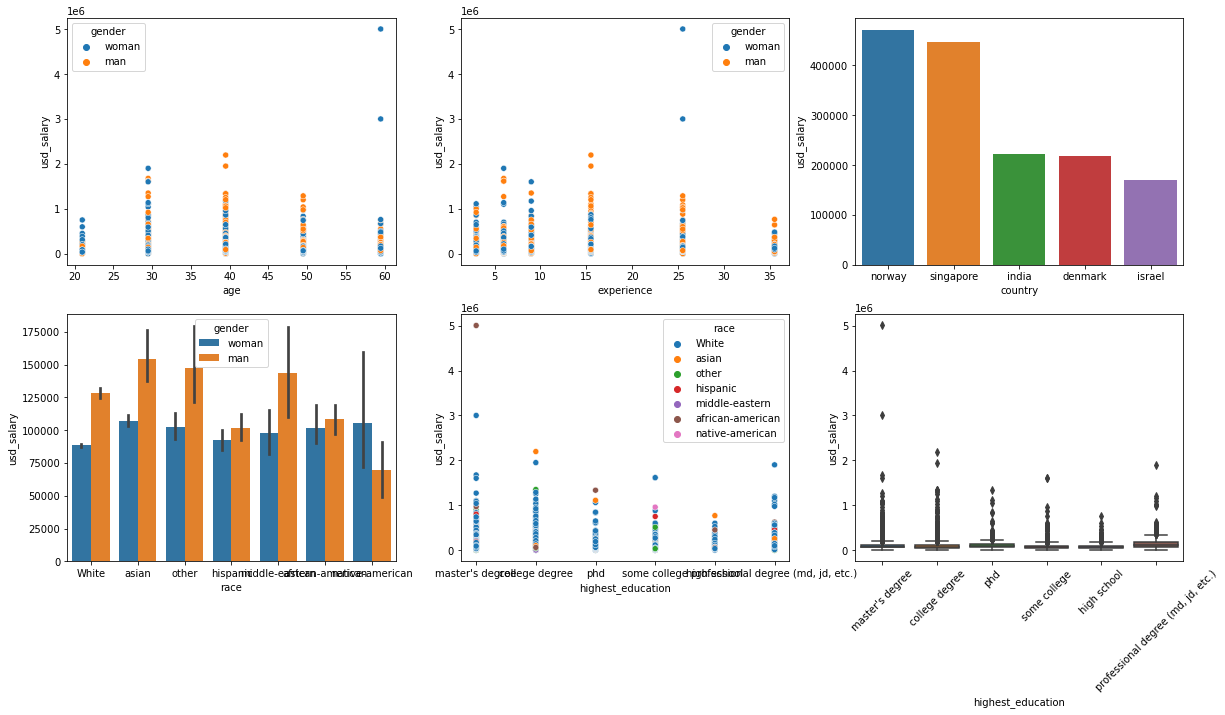

In [57]:
# Crea una grilla de 2 filas y 3 columnas
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Asigna la primera gráfica al primer elemento de la grilla (fila 0, columna 0)
sns.scatterplot(data = df, x = 'age', y = 'usd_salary', hue = 'gender', ax=ax[0, 0])

# Asigna la segunda gráfica al segundo elemento de la grilla (fila 0, columna 1)
sns.scatterplot(data = df, x = 'experience', y = 'usd_salary', hue = 'gender', ax=ax[0, 1])

# Asigna la tercera gráfica al tercer elemento de la grilla (fila 0, columna 2)
sns.barplot(x='country', y='usd_salary', data=df_grouped.sort_values(by='usd_salary', ascending=False).head(), ax=ax[0, 2])

# Asigna la cuarta gráfica al cuarto elemento de la grilla (fila 1, columna 0)
sns.barplot(x='race', y='usd_salary', hue='gender', data=df, ax=ax[1, 0])

# Asigna la quinta gráfica al quinto elemento de la grilla (fila 1, columna 1)
sns.scatterplot(x='highest_education', y='usd_salary', hue='race', data=df, ax=ax[1, 1])

# Asigna la sexta gráfica al sexto elemento de la grilla (fila 1, columna 2)
sns.boxplot(x='highest_education', y='usd_salary', data=df, ax=ax[1, 2])

# Gira las etiquetas del eje x de la última gráfica
plt.setp(ax[1, 2].get_xticklabels(), rotation=45)

# Muestra el plot
plt.show()

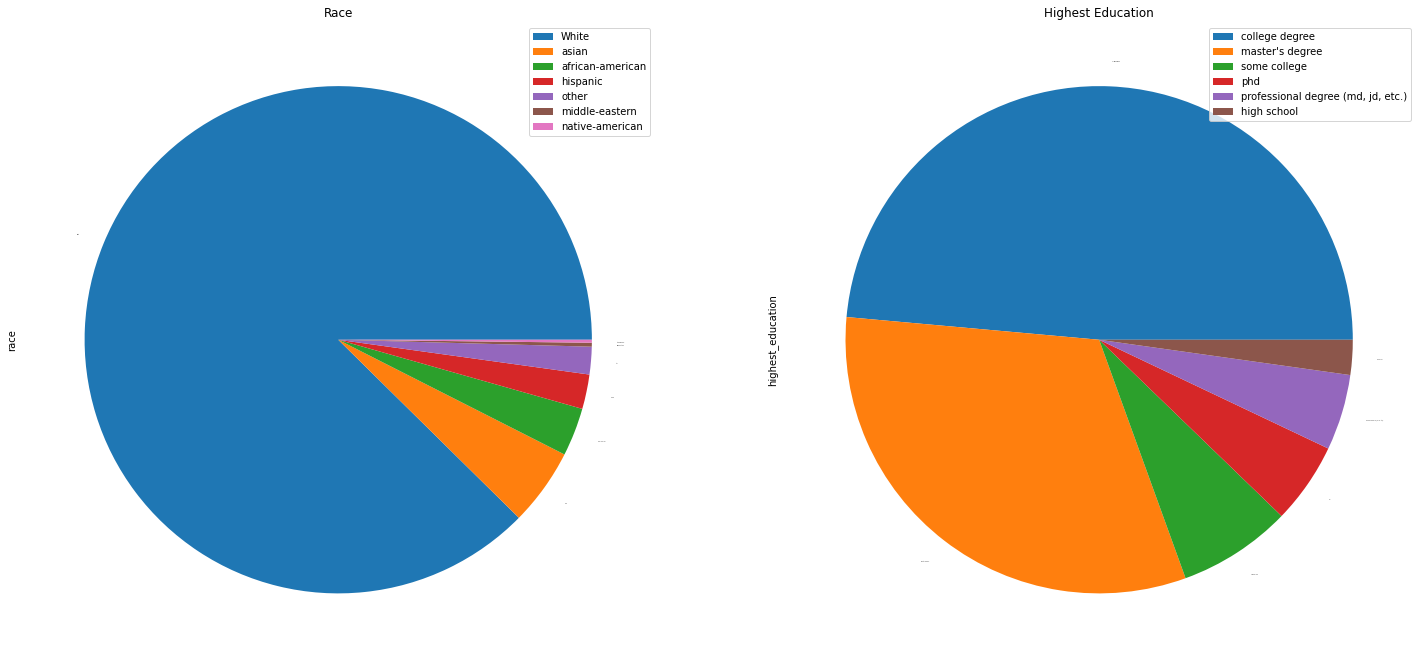

In [58]:
# Crea una figura con 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(25, 20))

# Gráfico de pastel para la columna 'race'
df['race'].value_counts().plot.pie(ax=ax[0], title='Race', legend=True, fontsize=0)

# Gráfico de pastel para la columna 'highest_education'
df['highest_education'].value_counts().plot.pie(ax=ax[1], title='Highest Education', legend=True, fontsize=0)

# Muestra la figura
plt.show()